# new model with multiple regression

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("houseprice.csv")

# take a look at the dataset
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [4]:
cdf = df[['Area','Room','Parking','Warehouse','Elevator','Price' ,"Price(USD)"]]
cdf.head(9)

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
0,63,1,True,True,True,1.850000e+09,61666.67
1,60,1,True,True,True,1.850000e+09,61666.67
2,79,2,True,True,True,5.500000e+08,18333.33
3,95,2,True,True,True,9.025000e+08,30083.33
4,123,2,True,True,True,7.000000e+09,233333.33
5,70,2,True,True,False,2.050000e+09,68333.33
6,87,2,True,True,True,6.000000e+08,20000.00
7,59,1,True,True,True,2.150000e+09,71666.67
8,54,2,True,True,False,4.930000e+08,16433.33


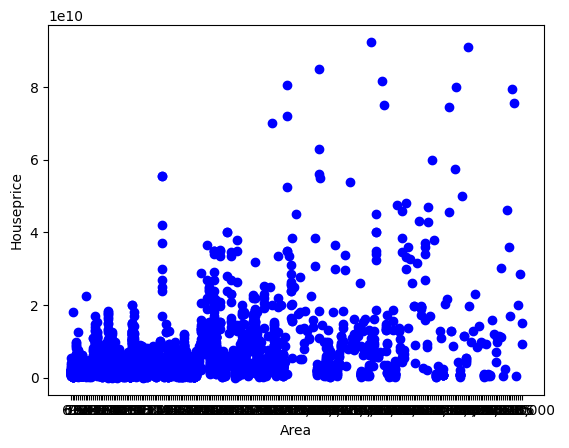

In [5]:
plt.scatter(cdf.Area, cdf.Price,  color='blue')
plt.xlabel("Area")
plt.ylabel("Houseprice")
plt.show()

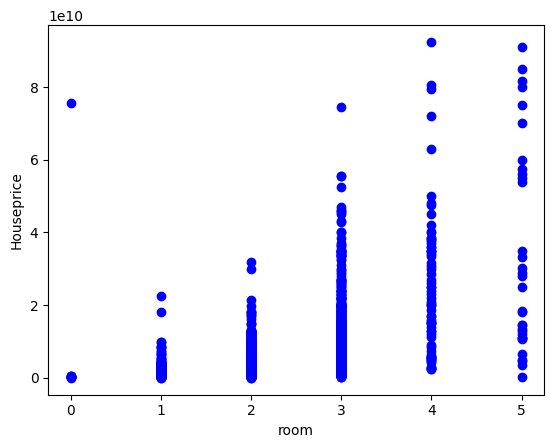

In [6]:
plt.scatter(cdf.Room, cdf.Price,  color='blue')
plt.xlabel("room")
plt.ylabel("Houseprice")
plt.show()

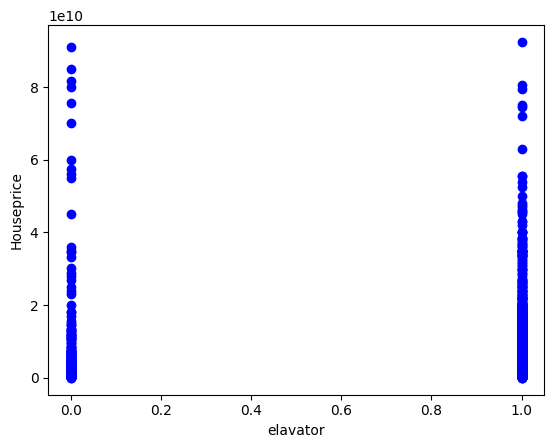

In [7]:
plt.scatter(cdf.Elevator, cdf.Price,  color='blue')
plt.xlabel("elavator")
plt.ylabel("Houseprice")
plt.show()

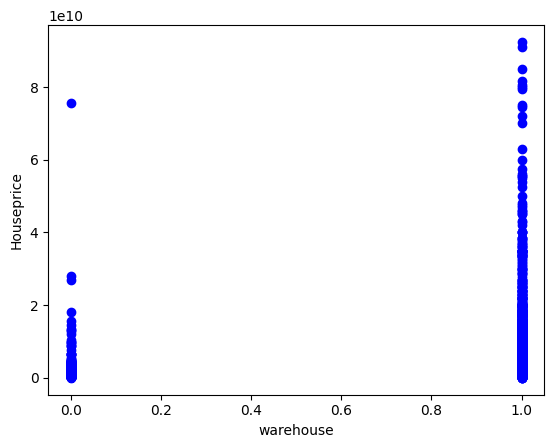

In [8]:
plt.scatter(cdf.Warehouse, cdf.Price,  color='blue')
plt.xlabel("warehouse")
plt.ylabel("Houseprice")
plt.show()

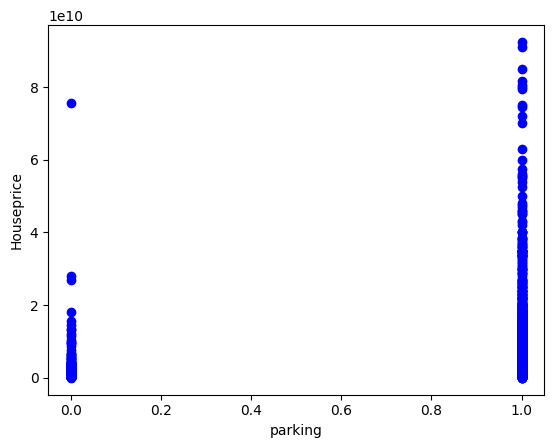

In [9]:
plt.scatter(cdf.Parking, cdf.Price,  color='blue')
plt.xlabel("parking")
plt.ylabel("Houseprice")
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Elevator', 'Warehouse' , "Parking" ]])
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67


In [11]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [22]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Room','Parking','Warehouse' , "Elevator" ]])
y = np.asanyarray(train[['Price']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[5.67715592e+09 7.30540102e+08 9.74227911e+08 2.72766729e+08]]


In [23]:
y_hat= regr.predict(test[['Room','Parking','Warehouse' , "Elevator" , ]])
x = np.asanyarray(test[['Room','Parking','Warehouse' , "Elevator" , ]])
y = np.asanyarray(test[["Price"]])
print("Residual sum of squares: %.2f" % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 58664195944768806912.00
Variance score: 0.32


C:\Users\barsam\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [25]:
from sklearn.metrics import r2_score
y_hat= regr.predict(test[['Room','Parking','Warehouse' , "Elevator" ]])
x = np.asanyarray(test[['Room','Parking','Warehouse' , "Elevator"  ]])
y = np.asanyarray(test[["Price"]])
r2 = r2_score(y, y_hat)
print('R² score: {:.2f}'.format(r2))


R² score: 0.32


C:\Users\barsam\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
